### Machine Learning Project on Profit Prediction using Multiple Linear Regression

In [1]:
#Importing the Libaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data Set
df=pd.read_csv("Machine Learning Project on Profit Prediction using Multiple Linear Regression DataSet/online.csv")
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

<AxesSubplot:>

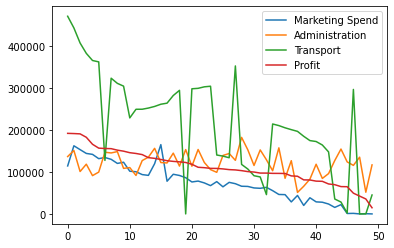

In [6]:
df.plot()

In [7]:
# if missing value
# missing=df.Administration.mean()
# df.Administration=df.Administration.fillna(missing)

### Separate x,y

In [8]:
x=df.drop(["Profit"],axis=1)
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [9]:
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### One Hot Encoding

In [10]:
#Convert the column into catagorical column
city_name=pd.get_dummies(x["Area"],drop_first=False)
city_name.head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [11]:
#Convert the column into catagorical column
city_name=pd.get_dummies(x["Area"],drop_first=True)
city_name.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [12]:
#concatation
x=pd.concat([x,city_name],axis=1)
x.head()

,Marketing Spend,Administration,Transport,Area,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,Dhaka,1,0
1,162597.70,151377.59,443898.53,Ctg,0,0
2,153441.51,101145.55,407934.54,Rangpur,0,1
3,144372.41,118671.85,383199.62,Dhaka,1,0
4,142107.34,91391.77,366168.42,Rangpur,0,1


In [13]:
x=x.drop("Area",axis=1)
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,1,0
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,1,0
4,142107.34,91391.77,366168.42,0,1


### linear regression algorithm

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg=LinearRegression()

In [16]:
reg.fit(x,y)

LinearRegression()

In [17]:
reg.score(x,y)

0.9011580356601149

In [18]:
reg.predict([[114523.61,136897.80,471784.10,1,0]]) # 192261.83

array([159292.15286333])

### Again Multiple linear regression algorithm

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
x_test

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
28,66051.52,182645.56,118148.20,0,1
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,0,1
41,27892.92,84710.77,164470.71,0,1
2,153441.51,101145.55,407934.54,0,1
27,72107.60,127864.55,353183.81,1,0
38,20229.59,65947.93,185265.10,1,0
31,61136.38,152701.92,88218.23,1,0
22,73994.56,122782.75,303319.26,0,1
4,142107.34,91391.77,366168.42,0,1


In [28]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
Name: Profit, dtype: float64

In [29]:
# Predicting the Test set results
pred=reg.predict(x_test)
pred

array([103501.0825284 , 128011.28068627, 126695.43891127,  70573.91718775,
       173381.96874259, 124238.07860872,  69298.09250304,  98399.41936876,
       116419.1480864 , 161430.98134847,  94740.73303076,  89920.22800514,
       105956.86065332])

In [30]:
reg.score(x_test,y_test)

0.8840978623923469

### Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mean_squared_error(y_test, pred)

125034305.46555004

In [33]:
r2_score(y_test,pred)
#So, Our Model Accuracy is 85.78%

0.8840978623923469